<a href="https://colab.research.google.com/github/kkarinakomkova/python-projects/blob/main/E_commerce_Sales_Analysis_%26_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Overview**

### **Опис змінних**

1. Інформація про замовлення
* *order_id* – ідентифікатор замовлення
* *order_date* – дата створення замовлення
* *ship_date* – дата відправлення товару
* *order_priority* – пріоритет замовлення

2. Інформація про товар
* *product_id, id* – унікальний ідентифікатор товару
* *item_type* – категорія товару

3. Продажі та фінанси
* *units_sold* – кількість проданих одиниць товару
* *unit_price* – ціна за одну одиницю товару (вартість для покупця)
* *unit_cost* – собівартість однієї одиниці товару (витрати компанії)

4. Інформація про країну та регіон
* *country_code* – код країни у форматі ISO
* *country_name (name)* – назва країни
* *region* – регіон, до якого належить країна (наприклад, "Європа", "Азія")
* *sub-region* – підрегіон всередині регіону (наприклад, "Західна Європа", "Південна Азія")

5. Канал продажу
* *sales_channel* – канал продажу

### **Ключові поля, що поєднують три таблиці**
* events → products по product_id
* events → countries по country_code


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Підключаю Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/My Drive/homework/"

# 2. Завантажую датасети
countries = pd.read_csv(path + "countries.csv")
events = pd.read_csv(path + "events.csv")
products = pd.read_csv(path + "products.csv")

# Функція для відображення огляду кожного датасету
def overview(df, name):
    print(f"\n *{name}* ")
    print("Перші кілька рядків:")
    print(df.head())
    print("\nІнформація:")
    df.info()
    print("\nПропущені значення:")
    print(df.isnull().sum())
    print("\nДублікати:", df.duplicated().sum())

# 3. Переводжу назви колонок у нижній регістр
countries.columns = countries.columns.str.lower()
events.columns = events.columns.str.lower()
products.columns = products.columns.str.lower()

# 4. Відображення огляду всіх датасетів
for name, df in [("Countries", countries), ("Events", events), ("Products", products)]:
    overview(df, name)

Mounted at /content/drive

 *Countries* 
Перші кілька рядків:
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

Інформація:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB

Пропущені значення:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

Дублікати: 0

 *Events* 
П

## **Data Cleansing**

In [ ]:
# Замінюю вручну пропущені значення у таблиці countries
countries.loc[countries["name"] == "Antarctica", "region"] = "Antarctica"
countries.loc[countries["name"] == "Antarctica", "sub-region"] = "Antarctica"
countries.loc[countries["name"] == "Namibia", "alpha-2"] = "NA"

# Видаляю пропущені значення для "units sold"
events = events.dropna(subset=["units sold"]).copy()

# Змінюю пропущені значення для "country code"
events["country code"] = events["country code"].fillna("Unknow")

# Висновки:
# 1. У таблиці countries маємо пропущені значення, тому замінюю їх вручну, щоб забезпечити цілісність даних
# 2. У таблиці events видалила 2 рядки з пропущеними значеннями у колонці units_sold, що не вплинуло суттєво на загальну структуру даних.
# 3. У таблиці events для пропусків у country_code застосувала заміну на значення "Unknow", щоб у візуалізаціях це виглядало зрозуміло та акуратно.

In [ ]:
# Перетворюю дати в потрібний формат
events["order date"] = pd.to_datetime(events["order date"], format="%m/%d/%Y")
events["ship date"] = pd.to_datetime(events["ship date"], format="%m/%d/%Y")

# Висновки:
# 1. Тип даних у колонках order date i ship date розпізнавались як object, тому змінюю їх тип на datetime

In [ ]:
# Перевіряю наявність дублікатів
print(f"Кількість дублікатів в events: {events.duplicated().sum()}")
print(f"Кількість дублікатів в products: {products.duplicated().sum()}")
print(f"Кількість дублікатів в countries: {countries.duplicated().sum()}")

# Висновки:
# 1. Перевіряю таблиці на наявність дублікатів
# 2. Дублікатів у таблицях не виявлено

Кількість дублікатів в events: 0
Кількість дублікатів в products: 0
Кількість дублікатів в countries: 0


Перевірка на аномальні значення:
 1. Ціна одиниці (unit price) - min: 9.33 (досить низька ціна), max: 668.27

  Це може свідчити про аномалії, якщо ціни значно відрізняються для певних продуктів, що потребує додаткового аналізу.

 2. Вартість одиниці (unit cost) - min: 6.92 (дуже низька вартість), max: 524.96.

 Це свідчить про можливі аномалії з дуже низькими вартостями.

In [ ]:
# Перейменовую колонки у таблицях для зручності
products = products.rename(columns={"id": "product_id"})

events= events.rename(columns={"country code": "country_code"})
events = events.rename(columns={"product id": "product_id"})

countries = countries.rename(columns={"name": "country_name"})
countries = countries.rename(columns={"alpha-3": "country_code"})

# Очищаю назви стовпців від зайвих пробілів
products = products.rename(columns=lambda x: x.strip().replace(" ", "_"))
events = events.rename(columns=lambda x: x.strip().replace(" ", "_"))
countries = countries.rename(columns=lambda x: x.strip().replace(" ", "_"))

# Висновки:
# 1. Очищаю назви стовпців, прибираючи зайві пробіли, роблячи їх нижнім регістром та замінюючи пробіли на підкреслення.
# 2. Це стандартизує назви стовпців для зручності роботи з даними.

# Основні статистичні показники
print(events.describe())
print(products.describe())
print(countries.describe())

           order_id                     order_date  \
count  1.328000e+03                           1328   
mean   5.416231e+08  2013-10-11 22:28:54.939759104   
min    1.006406e+08            2010-01-01 00:00:00   
25%    3.213291e+08            2011-12-14 06:00:00   
50%    5.399925e+08            2013-10-15 12:00:00   
75%    7.547357e+08            2015-08-29 12:00:00   
max    9.998797e+08            2017-07-23 00:00:00   
std    2.573496e+08                            NaN   

                           ship_date   product_id   units_sold   unit_price  \
count                           1328  1328.000000  1328.000000  1328.000000   
mean   2013-11-05 17:22:02.891566336  5787.775602  4952.201807   264.913245   
min              2010-01-10 00:00:00  1270.000000     2.000000     9.330000   
25%              2012-01-02 00:00:00  3127.000000  2356.750000    81.730000   
50%              2013-11-05 12:00:00  5988.000000  4962.000000   154.060000   
75%              2015-10-04 18:00:00  8

# **Data Analysis and Visualization**

In [ ]:
# З'єдную всі таблиці
data_events_products = pd.merge(events, products, on="product_id", how="left")
data = pd.merge(data_events_products, countries, on="country_code", how="left")
data = data.drop(columns=["alpha-2", "country_code"])

print(f"Successfully merged datasets!")
print(data.head())

# Висновки:
# 1. Об'єдную таблиці events i products за спільним стовпцем product_id
# 2. Об'єднання відбувається по лівому типу з'єднання (left join), що означає, що збережемо всі записи з таблиці events та додамо відповідні дані з таблиці products
# 3. Об'єдную новостворену таблицю data_events_products i countries за спільним стовпцем country_code
# 4. Видаляю колонки alpha-2 i country_code, так як для наступних обрахунків вони не будуть нам потрібні

Successfully merged datasets!
    order_id order_date  ship_date order_priority  product_id sales_channel  \
0  100640618 2014-10-08 2014-10-18              M        2103        Online   
1  100983083 2016-08-11 2016-08-11              C        2103       Offline   
2  101025998 2014-07-18 2014-08-11              M        7940        Online   
3  102230632 2017-05-13 2017-06-13              L        2455        Online   
4  103435266 2012-08-11 2012-09-18              H        1270       Offline   

   units_sold  unit_price  unit_cost  item_type country_name  region  \
0       650.0      205.70     117.11     Cereal       Norway  Europe   
1      1993.0      205.70     117.11     Cereal       Serbia  Europe   
2      4693.0      668.27     502.54  Household          NaN     NaN   
3      1171.0      109.28      35.84    Clothes   Montenegro  Europe   
4      7648.0       47.45      31.79  Beverages       Serbia  Europe   

        sub-region  
0  Northern Europe  
1  Southern Europe  

In [ ]:
# Рахую дохід компанії
data["revenue"] = data["units_sold"] * data["unit_price"] # Дохід

# Основні метрики компанії
print(f"Загальна кількість замовлень: {data['order_id'].value_counts().sum()} ")
print(f"Загальний дохід: {data['revenue'].sum().round(2)}")
print(f"Загальна кількість проданих одиниць товару: {data['units_sold'].sum()}")
print(f"Середня ціна за одиницю товару: {data['unit_price'].mean().round(2)}")
print(f"Загальна кількість охоплених країн: {data['country_name'].nunique()}")

Загальна кількість замовлень: 1328 
Загальний дохід: 1702129408.21
Загальна кількість проданих одиниць товару: 6576524.0
Середня ціна за одиницю товару: 264.91
Загальна кількість охоплених країн: 45


== Popular Product Category == 
          item_type  units_sold
8   Office Supplies    617641.0
1         Beverages    613133.0
5            Fruits    591672.0
3           Clothes    591385.0
11       Vegetables    582544.0
0         Baby Food    562706.0
9     Personal Care    557678.0
4         Cosmetics    533291.0
7              Meat    530380.0
10           Snacks    490160.0
2            Cereal    465685.0
6         Household    440249.0

== Cost by Product Category == 
          item_type          cost
8   Office Supplies  3.242368e+08
6         Household  2.212427e+08
7              Meat  1.934243e+08
4         Cosmetics  1.404315e+08
0         Baby Food  8.970659e+07
2            Cereal  5.453637e+07
11       Vegetables  5.297073e+07
10           Snacks  4.776119e+07
9     Personal Care  3.160361e+07
3           Clothes  2.119524e+07
1         Beverages  1.949150e+07
5            Fruits  4.094370e+06


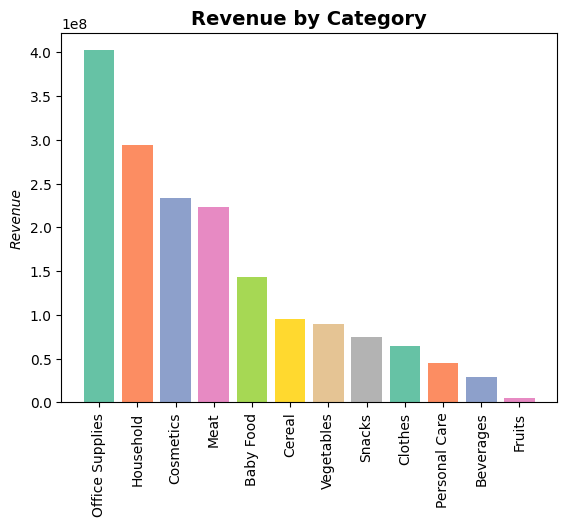

In [ ]:
# Визначаю, яка категорія приносить найбільше прибутку
data["profit"] = (data["unit_price"] - data["unit_cost"]) * data["units_sold"]
popular_category = data.groupby("item_type")["units_sold"].sum().reset_index().round(2)
popular_category = popular_category.sort_values(by="units_sold", ascending=False)
print(f"== Popular Product Category == \n{popular_category}")

# Визначаю, на яку категорію йде найбільше витрат
data["cost"] = (data["unit_cost"] * data["units_sold"]).round(2)
cost_by_category = data.groupby("item_type")["cost"].sum().reset_index().round(2)
cost_by_category = cost_by_category.sort_values(by="cost", ascending=False)
print(f"\n== Cost by Product Category == \n{cost_by_category}")

# Роблю візуалізацію яка категорія приносить найбільше прибутку
revenue_by_category = data.groupby("item_type")["revenue"].sum().reset_index().round(2)
revenue_by_category = revenue_by_category.sort_values(by="revenue", ascending=False)

colors = sns.color_palette("Set2", len(revenue_by_category))
plt.bar(revenue_by_category["item_type"], revenue_by_category["revenue"], color=colors)

plt.title("Revenue by Category", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("Revenue", fontsize=10, fontstyle="italic")
plt.tick_params(axis="x", rotation=90)
plt.show()

**Висновки**
1. Лідер за кількістю замовлень і доходом – категорія Офісних аксесуарів. Ці товари приносять найбільший прибуток, тому варто й надалі підтримувати їх у наявності та розглядати можливості для розширення асортименту.

2. Популярність vs. прибутковість. Фрукти займають третє місце за кількістю замовлень, проте приносять найменше доходу. Це може свідчити про необхідність перегляду цінової політики, оскільки попит на цю категорію вже високий.

3. Перспективи для підвищення цін. Товари з категорії Напоїв замовляють досить часто, але їхня прибутковість залишається низькою. Варто розглянути можливість коригування цін, щоб збільшити дохід від цієї категорії.

4. Баланс витрат і доходу. Цікаво, що категорії Фруктів та Напоїв приносять найменше прибутку, але водночас вимагають мінімальних витрат. Це відкриває можливості для оптимізації ціноутворення або маркетингових стратегій, щоб зробити їх більш прибутковими.

== Popular Regions ==
    region    units_sold
1  Europe  5,761,244.00
0    Asia    410,427.00


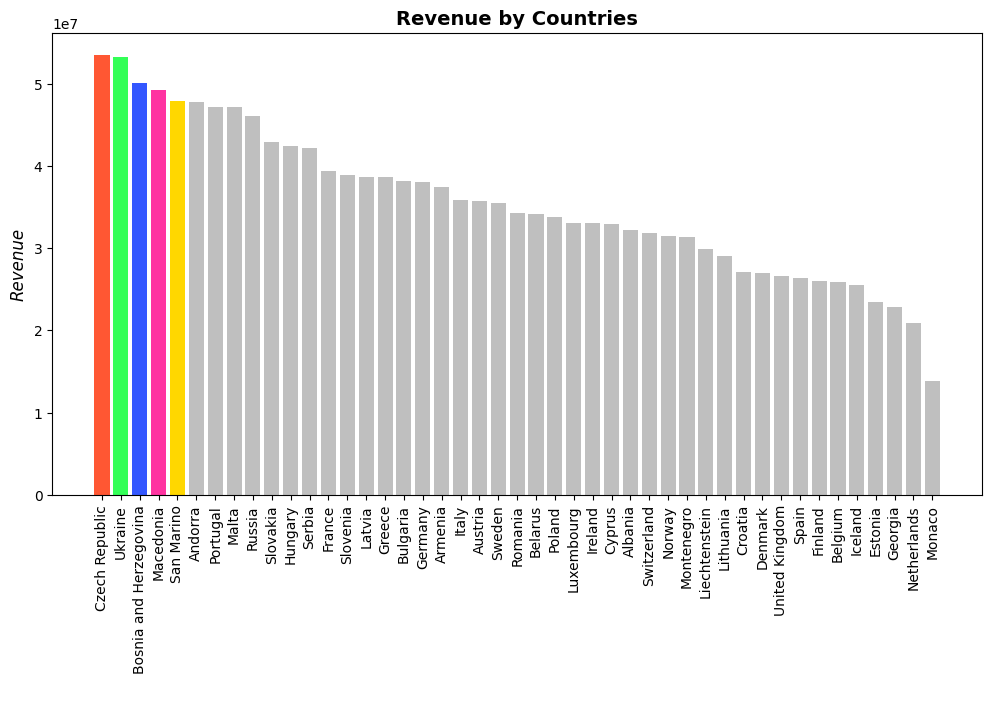

In [ ]:
# Визначаю, з якого регіону надходить найбільше прибутку
popular_regions = data.groupby("region")["units_sold"].sum().reset_index()
popular_regions["units_sold"] = popular_regions["units_sold"].apply(lambda x: "{:,.2f}".format(x))
popular_regions = popular_regions.sort_values(by="units_sold", ascending=False)
print("== Popular Regions ==\n", popular_regions)


# Роблю візуалізацію з яких країн отримуємо найбільше замовлень
revenue_by_countries = data.groupby("country_name")["revenue"].sum().reset_index().round(2)
revenue_by_countries = revenue_by_countries.sort_values(by="revenue", ascending=False)

# Виділяю топ-5 країн
top_5 = revenue_by_countries.head(5)
rest = revenue_by_countries.iloc[5:]

plt.figure(figsize=(12, 6))

# Всі країни сірі, а топ-5 — інші кольори
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFD700']
gray_colors = ['gray'] * len(rest)

plt.bar(top_5["country_name"], top_5["revenue"], color=colors, label="Top 5 Countries")
plt.bar(rest["country_name"], rest["revenue"], color=gray_colors, alpha=0.5, label="Other Countries")
plt.title("Revenue by Countries", fontsize=14, fontweight="bold")
plt.xlabel(" ")
plt.ylabel("Revenue", fontsize=12, fontstyle="italic")
plt.xticks(rotation=90)
plt.show()

**Висновки**

1. Основний сегмент клієнтів – Європа. Найбільше замовлень надходить саме з цього регіону, тому варто й надалі орієнтуватися на європейський ринок. Водночас перспективним напрямком для розширення може стати дистрибуція в Америку. Для залучення нових клієнтів варто активно використовувати соціальні мережі та адаптувати їх для англомовної аудиторії.

2. Ключові країни за рівнем доходу. Найбільший прибуток приносять Чехія та Україна, тоді як найменше замовлень надходить із Монако. Потрібно детальніше проаналізувати причини такої тенденції: які рекламні стратегії працюють в Україні та Чехії, і чи можна їх застосувати в інших країнах. Якщо аналогічні методи вже використовувалися в інших регіонах, але не дали результату, варто з’ясувати, що саме заважає їхній ефективності.

== Profit by Sales Channel == 
  sales_channel        profit
0       Offline  2.534665e+08
1        Online  2.479679e+08


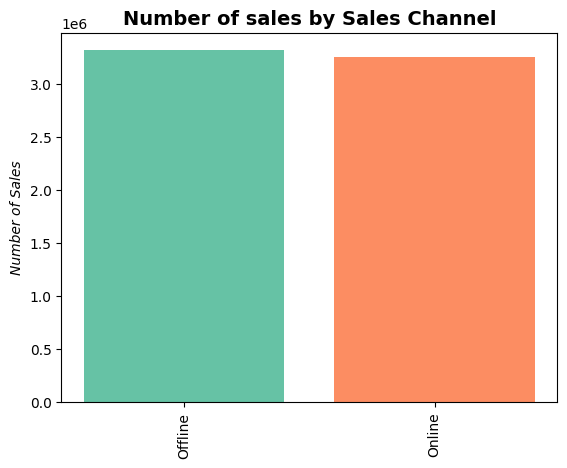

In [ ]:
# Форматую значення у колонці Sales Channel, щоб значення починались з великої літери
data["sales_channel"] = data["sales_channel"].str.capitalize()

# Визначаю, з якого каналу продажу отримуємо найбільше прибутку
profit_by_sales_channel = data.groupby("sales_channel")["profit"].sum().reset_index().round(2)
profit_by_sales_channel = profit_by_sales_channel.sort_values(by="profit", ascending=False)
print(f"== Profit by Sales Channel == \n{profit_by_sales_channel}")

# Роблю візуалізацію з якого каналу отримуємо найбільше замовлень
popular_sales_channel = data.groupby("sales_channel")["units_sold"].sum().reset_index().round(2)
popular_sales_channel = popular_sales_channel.sort_values(by="units_sold", ascending=False)

colors = sns.color_palette("Set2", len(popular_sales_channel))
plt.bar(popular_sales_channel["sales_channel"], popular_sales_channel["units_sold"], color=colors)

plt.title("Number of sales by Sales Channel", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("Number of Sales", fontsize=10, fontstyle="italic")
plt.tick_params(axis="x", rotation=90)
plt.show()

**Висновки**

Аналізуючи кількість замовлень і дохід за каналами продажу, можна відзначити, що результати є досить схожими: онлайн і офлайн-продажі знаходяться на приблизно однаковому рівні, хоча офлайн незначно переважає. Це свідчить про стабільний розподіл клієнтських уподобань, проте варто дослідити можливості для розвитку обох напрямків, зокрема вдосконалення онлайн-каналу для залучення ще більшої аудиторії.

In [ ]:
# Рахую час доставки як різницю між датою замовлення та датою відправлення
data["ship_date"] = pd.to_datetime(data["ship_date"])
data["order_date"] = pd.to_datetime(data["order_date"])
data["shipping_time"] = (data["ship_date"] - data["order_date"]).dt.days

# Середній час доставки у розрізі категорій товарів
average_shipping_by_category = data.groupby("item_type")["shipping_time"].mean().round(2)
average_shipping_by_category = average_shipping_by_category.sort_values(ascending=False)
print(f"== Average Shipping Time by Product Category == \n{average_shipping_by_category}")

# Середній час доставки у розрізі країн
average_shipping_by_country = data.groupby("country_name")["shipping_time"].mean().round(2)
average_shipping_by_country = average_shipping_by_country.sort_values(ascending=False)
print(f"\n== Average Shipping Time by Countries == \n{average_shipping_by_country}")

# Середній час доставки у розрізі каналів продажу
average_shipping_by_channel = data.groupby("sales_channel")["shipping_time"].mean().round(2)
average_shipping_by_channel = average_shipping_by_channel.sort_values(ascending=False)
print(f"\n== Average Shipping Time by Sales Channel == \n{average_shipping_by_channel}")

== Average Shipping Time by Product Category == 
item_type
Cereal             27.18
Office Supplies    26.71
Baby Food          26.34
Cosmetics          25.91
Meat               25.91
Snacks             25.54
Fruits             24.42
Beverages          24.12
Household          23.94
Vegetables         23.49
Clothes            23.10
Personal Care      20.76
Name: shipping_time, dtype: float64

== Average Shipping Time by Countries == 
country_name
Hungary                   32.64
Georgia                   29.70
Austria                   28.50
Slovakia                  28.47
Luxembourg                27.75
Lithuania                 27.56
Poland                    27.46
Russia                    27.38
Monaco                    26.85
Bulgaria                  26.80
Montenegro                26.68
Netherlands               26.62
Belgium                   26.54
Spain                     26.44
France                    26.42
Andorra                   26.28
Finland                   26.22
Alban

**Висновки**
Аналізуючи середній час, необхідний для відвантаження замовлень, можна виділити такі тенденції:

1. Найшвидше доставляються товари особистої гігієни, тоді як найдовше часу потребують крупи та офісні аксесуари. Це може бути пов’язано з логістичними особливостями або постачальниками цих товарів.

2. За країнами: найшвидше відвантаження відбувається у Хорватію та Велику Британію, тоді як найдовше триває доставка до Угорщини. Варто проаналізувати причини таких відмінностей і розглянути можливості оптимізації логістики для угорського ринку.

3. За каналами продажу: ситуація приблизно однакова, що свідчить про стабільну ефективність логістики незалежно від способу реалізації товарів.

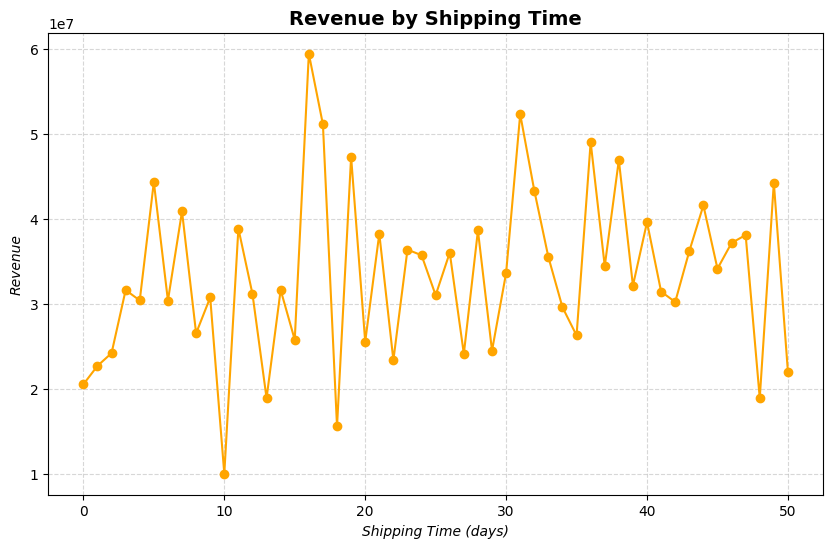


Correlation between shipping time and revenue: 0.07


In [ ]:
# Аналізую, чи залежить прибуток від часу, необхідного на відвантаження товару
revenue_by_shipping_time = data.groupby("shipping_time")["revenue"].sum()

plt.figure(figsize=(10, 6))
revenue_by_shipping_time.plot(kind="line", marker="o", color="orange")
plt.title("Revenue by Shipping Time", fontsize=14, fontweight="bold")
plt.xlabel("Shipping Time (days)", fontsize=10, fontstyle="italic")
plt.ylabel("Revenue", fontsize=10, fontstyle="italic")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Кореляційний аналіз між часом доставки та прибутком
correlation = data['shipping_time'].corr(data['revenue'])
print(f"\nCorrelation between shipping time and revenue: {correlation:.2f}")

**Висновки**

Аналізуючи кореляцію між доходом та часом, необхідним для відвантаження товарів (0.7), можна зробити кілька цікавих висновків:

1. Загальна ситуація виглядає відносно нормалізованою, без різких аномалій.

2. Найбільше доходу приносять товари з часом відвантаження близько 15 днів, тоді як найменше – товари, які відвантажуються за 10 днів.

3. Дивовижно, що товари з 50-денною доставкою приносять більше доходу, ніж ті, що потребують лише 10 днів. Це може свідчити про те, що довші терміни відвантаження характерні для товарів із вищою вартістю або оптовими замовленнями.

Ці тенденції варто детальніше проаналізувати, щоб зрозуміти, чи можна оптимізувати логістику і підвищити прибутковість швидшої доставки.

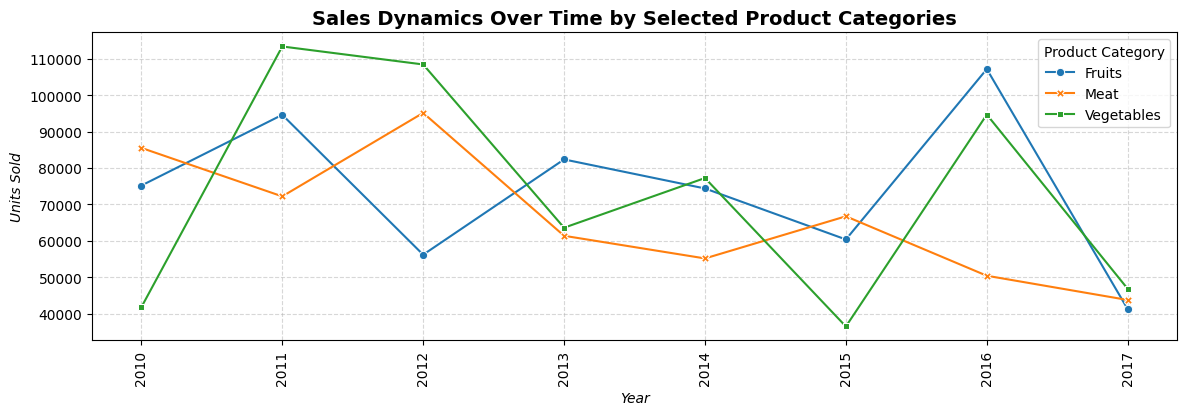

In [ ]:
# Витягую рік, щоб зробити графік більш читабельним та зрозумілим
data["year"] = pd.to_datetime(data["order_date"]).dt.year

# Групую продажі за роками та категорією продукту
sales_trend_category = data.groupby(["year", "item_type"])["units_sold"].sum().reset_index()

# Фільтрую дані, залишаючи лише потрібні категорії товарів
filtered_data = sales_trend_category[sales_trend_category["item_type"].isin(["Fruits", "Meat", "Vegetables"])]

# Створюю графік динаміки продажів у розрізі вибраних категорій товарів
plt.figure(figsize=(14, 4))
sns.lineplot(data=filtered_data, x="year", y="units_sold", hue="item_type", style="item_type", markers=True, dashes=False)

plt.title("Sales Dynamics Over Time by Selected Product Categories", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontstyle="italic")
plt.ylabel("Units Sold", fontsize=10, fontstyle="italic")
plt.xticks(rotation=90)
plt.legend(title="Product Category")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Висновки**

Аналізуючи динаміку продажів трьох категорій – фрукти, м’ясо та овочі, можна зробити такі висновки:

1. Фрукти демонструють відносну стабільність, за винятком сильного спаду у 2012 році та значного зростання у 2016 році.

2. М’ясо має негативну тенденцію – його продажі щороку знижуються. Це може свідчити про зміну споживчих вподобань або проблеми в постачанні.

3. Овочі – найбільш нестабільна категорія: спостерігаються різкі сплески та падіння. Лише у 2011 та 2012 роках ситуація була стабільною, після чого почалися значні коливання.

Для подальшого аналізу варто розглянути, які фактори впливають на такі зміни – сезонність, ринкові умови або зміни в маркетингових стратегій.

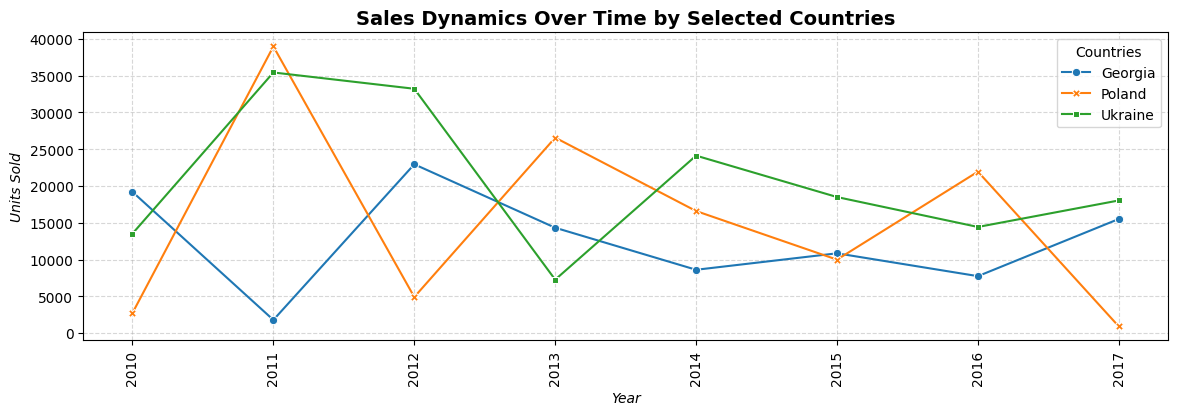

In [ ]:
# Групую продажі за роками та країнами
sales_trend_country = data.groupby(["year", "country_name"])["units_sold"].sum().reset_index()

# Фільтрую дані, залишаючи лише потрібні країни
filtered_data = sales_trend_country[sales_trend_country["country_name"].isin(["Ukraine", "Poland", "Georgia"])]

# Створюю графік динаміки продажів у розрізі вибраних країн
plt.figure(figsize=(14, 4))
sns.lineplot(data=filtered_data, x="year", y="units_sold", hue="country_name", style="country_name", markers=True, dashes=False)

plt.title("Sales Dynamics Over Time by Selected Countries", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontstyle="italic")
plt.ylabel("Units Sold", fontsize=10, fontstyle="italic")
plt.xticks(rotation=90)
plt.legend(title="Countries")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Висновки**

Аналізуючи продажі в Грузії, Україні та Польщі, можна виділити такі тенденції:

1. Україна: У 2011 році була серед лідерів за продажами, але у 2013 році відбувся різкий спад. Після цього продажі відновилися і наразі залишаються стабільними.

2. Польща: Дуже нестабільна динаміка – у 2010 році продажі були низькими, у 2011 році – на піку, після чого в 2012 році стався різкий спад, а в 2013 – знову зростання. Найгірший показник зафіксовано у 2017 році.

3. Грузія: Навпаки, демонструє відносну стабільність. У 2011 році продажі були низькими, потім відбулося зростання, і рівень продажів тримається приблизно на тому ж рівні.

Варто глибше дослідити причини таких змін, зокрема вплив економічної ситуації, попиту на товари та ефективності маркетингових стратегій у кожній країні.

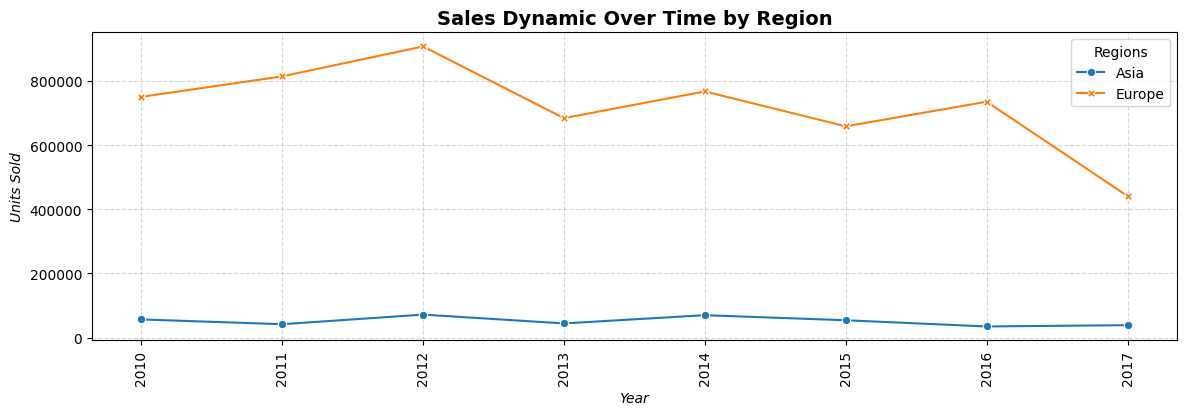

In [ ]:
# Групую продажі за роками та регіонами
sales_trend_region = data.groupby(["year", "region"])["units_sold"].sum().reset_index()

# Створюю графік динаміки продажів у розрізі регіонів
plt.figure(figsize=(14, 4))
sns.lineplot(data=sales_trend_region, x="year", y="units_sold", hue="region", style="region", markers=True, dashes=False)

plt.title("Sales Dynamic Over Time by Region", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontstyle="italic")
plt.ylabel("Units Sold", fontsize=10, fontstyle="italic")
plt.xticks(rotation=90)
plt.legend(title="Regions")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

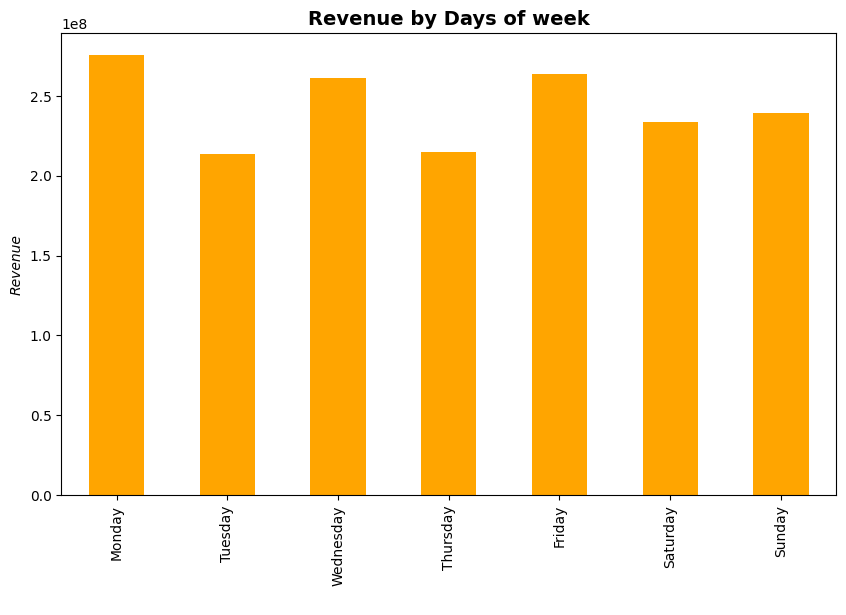

In [ ]:
sales_by_day = data.groupby(data['order_date'].dt.day_name())["revenue"].sum()
sales_by_day = sales_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='orange')
plt.title("Revenue by Days of week", fontsize=14, fontweight="bold")
plt.xlabel(" ")
plt.ylabel("Revenue", fontsize=10, fontstyle="italic")
plt.xticks(rotation=90)
plt.show()

**Висновки**

Аналізуючи доходи відносно днів тижня, можна виділити такі закономірності:

1. Найбільші прибутки спостерігаються у понеділок, середу та п’ятницю. Це може свідчити про активність покупців на початку та в середині робочого тижня.

2. Найменше доходу генерується у вівторок.

Ці дані можна використати для оптимізації рекламних кампаній та спеціальних пропозицій у менш прибуткові дні, щоб вирівняти продажі протягом тижня.

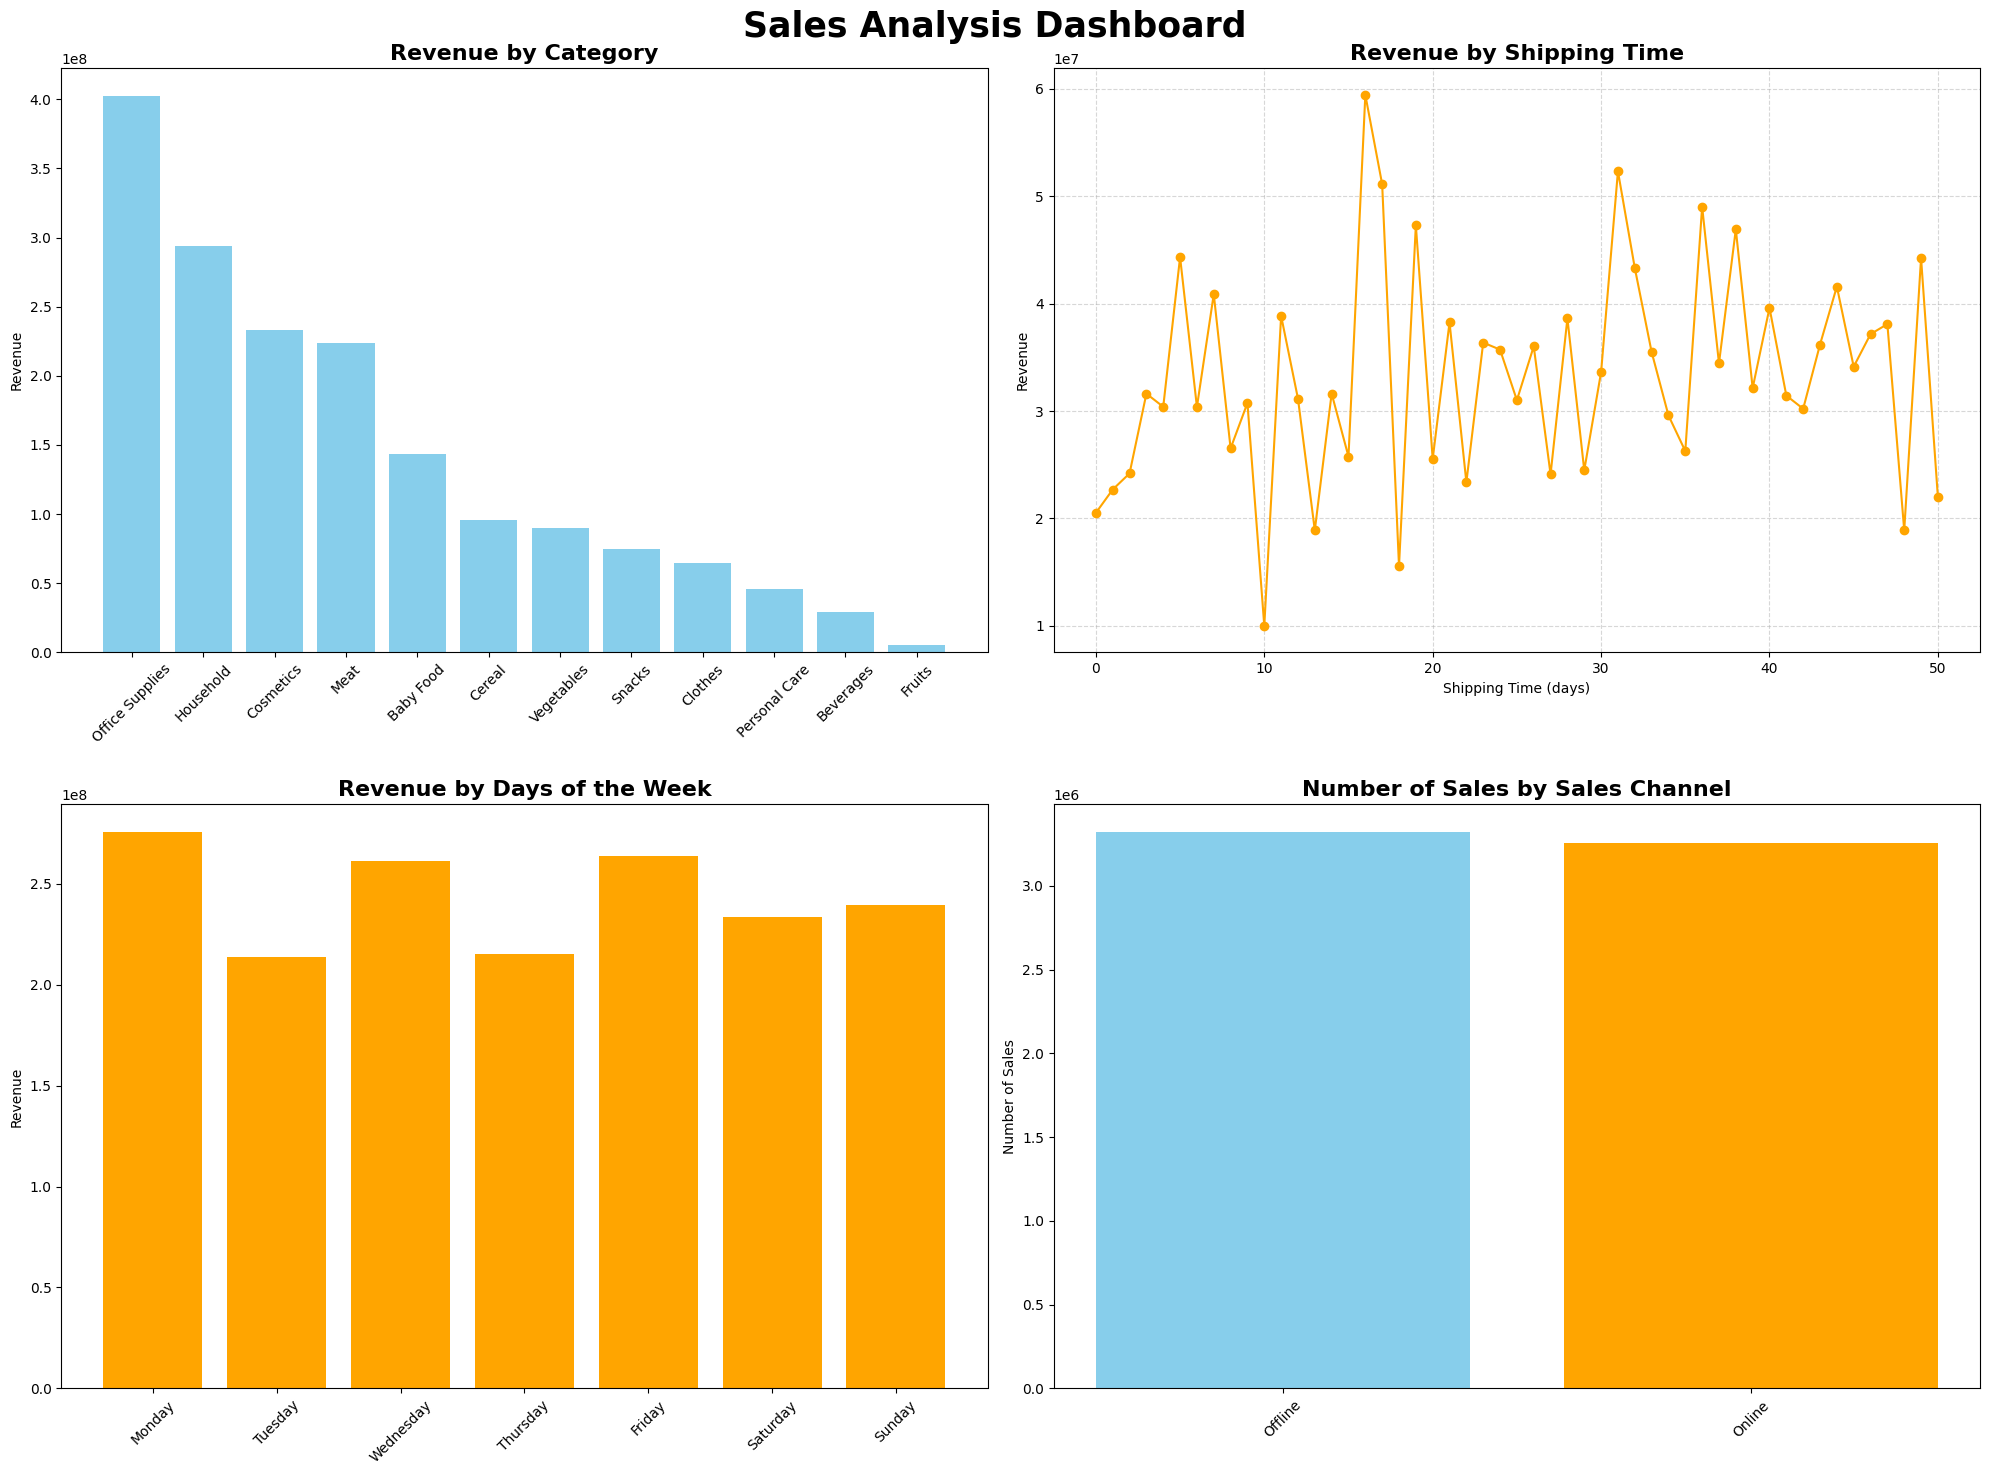

In [ ]:
# Створення мінідашборду для найцікавіших результатів
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Sales Analysis Dashboard", fontsize=25, fontweight="bold")

# Графік 1. Категорія, яка приносить найбільше доходу
axes[0, 0].bar(revenue_by_category["item_type"], revenue_by_category["revenue"], color="skyblue")
axes[0, 0].set_title("Revenue by Category", fontsize=16, fontweight="bold")
axes[0, 0].set_xlabel(" ")
axes[0, 0].set_ylabel("Revenue")
axes[0, 0].tick_params(axis="x", rotation=45)

# Графік 2. Чи залежить дохід від часу, необхідного на відвантаження товару
axes[0, 1].plot(revenue_by_shipping_time.index, revenue_by_shipping_time.values, marker="o", color="orange")
axes[0, 1].set_title("Revenue by Shipping Time", fontsize=16, fontweight="bold")
axes[0, 1].set_xlabel("Shipping Time (days)")
axes[0, 1].set_ylabel("Revenue")
axes[0, 1].grid(True, linestyle="--", alpha=0.5)

# Графік 3. Динаміка доходу по днях тижня
axes[1, 0].bar(sales_by_day.index, sales_by_day.values, color="orange")
axes[1, 0].set_title("Revenue by Days of the Week", fontsize=16, fontweight="bold")
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("Revenue")
axes[1, 0].tick_params(axis="x", rotation=45)

# Графік 4. Продажі за каналами продажу
axes[1, 1].bar(popular_sales_channel["sales_channel"], popular_sales_channel["units_sold"], color=["skyblue", "orange"])
axes[1, 1].set_title("Number of Sales by Sales Channel", fontsize=16, fontweight="bold")
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("Number of Sales")
axes[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

**Загальний висновок**

Компанія має стабільний європейський ринок, але є можливості для розширення, зокрема на Америку та інші країни. Деякі категорії товарів потребують корекції цін, а логістичні процеси – оптимізації. Онлайн-продажі слід розвивати активніше, використовуючи соціальні мережі та таргетовану рекламу.

## **АВС-аналіз за принципом Парето**

In [ ]:
import pandas as pd
from datetime import datetime

# Останній рік у датасеті
latest_year = data['order_date'].dt.year.max()

# Фільтрація за останнім доступним роком
last_year_data = data[data['order_date'].dt.year == latest_year].copy()

last_year_data['total_cost'] = last_year_data['units_sold'] * last_year_data['unit_cost']
last_year_data['total_profit'] = last_year_data['revenue'] - last_year_data['total_cost']

abc_data = last_year_data.groupby('product_id').agg({
    'units_sold': 'sum',
    'revenue': 'sum',
    'total_cost': 'sum',
    'total_profit': 'sum'
}).sort_values(by='revenue', ascending=False)

# Функція для класифікації за принципом Парето
def classify_pareto(series):
    percentiles = series.rank(pct=True)
    return pd.cut(percentiles, bins=[0, 0.8, 0.95, 1.0], labels=['A', 'B', 'C'])

# Класифікація продуктів за кількістю продажів, виторгом та прибутком
abc_data['sales_category'] = classify_pareto(abc_data['units_sold'])
abc_data['revenue_category'] = classify_pareto(abc_data['revenue'])
abc_data['profit_category'] = classify_pareto(abc_data['total_profit'])

print("ABC Analysis Results:")
print(abc_data.head())

# Висновки
# Категорія A: Найважливіші товари, які дають основну частину виторгу, прибутку та продажів.
# Категорія B: Товари з середнім рівнем значущості.
# Категорія C: Товари з найменшим впливом на загальні показники.

# Рекомендації:
# Посилити маркетинг та запаси для категорії A.
# Оптимізувати цінову політику товарів із B, щоб збільшити їхню прибутковість.
# Проаналізувати товари з C на доцільність їх подальшого продажу або переглянути цінову стратегію.

ABC Analysis Results:
            units_sold      revenue   total_cost  total_profit sales_category  \
product_id                                                                      
8681           52535.0  34211317.35  27578773.60    6632543.75              A   
8293           62307.0  27240620.40  16407302.31   10833318.09              B   
7940           33192.0  22181217.84  16680307.68    5500910.16              A   
8875           43722.0  18445874.58  15944976.18    2500898.40              A   
8969           74154.0  11314417.32   7225565.76    4088851.56              B   

           revenue_category profit_category  
product_id                                   
8681                      C               B  
8293                      B               C  
7940                      B               B  
8875                      A               A  
8969                      A               A  
